In [1]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.cluster import KMeans #聚类模块
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle('./output/df.pkl.zstd', compression='zstd')

In [3]:
df.webgl_time

00000.proto.pkl        None
00001.proto.pkl        None
00002.proto.pkl    0.339832
00003.proto.pkl        None
00004.proto.pkl        None
                     ...   
29237.proto.pkl        None
29238.proto.pkl        None
29239.proto.pkl        None
29240.proto.pkl        None
29241.proto.pkl        None
Name: webgl_time, Length: 29241, dtype: object

In [4]:
a = df[~df.webgl_time.isna()].index.map(lambda x: int(x[:5])).unique().tolist()

In [5]:
pickle.dump(a, open('./output/valid_ids.pkl', 'wb'))

In [6]:
df_webgl = df[~df.webgl_time.isna()]

In [7]:
df_webgl

,status,cpu_real,cpu_full,gpu_real,gpu_full,webgl_time,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
00002.proto.pkl,Ok,0.906576,0.980683,0.503714,0.545135,0.339832,99.227539,1211.305469,645.098828,362.060742,{'Service: tracing.mojom.TracingService_5_2081...
00011.proto.pkl,Ok,0.529102,0.686112,0.936136,0.977421,0.730202,95.673047,657.800977,441.449414,368.648633,{'Service: storage.mojom.StorageService_9_2198...
00015.proto.pkl,Ok,5.639269,6.113907,3.489915,8.631206,8.379561,91.497266,756.732617,234.8875,293.233789,"{'Browser_1_3372': [88.171875, 90.4765625, 89...."
00017.proto.pkl,Ok,8.115357,8.500925,3.298216,3.369785,3.208745,371.834961,1497.736914,2214.099609,400.996289,{'Service: network.mojom.NetworkService_5_2198...
00020.proto.pkl,Ok,3.518675,3.831758,0.862565,2.669846,2.515668,91.129688,741.955664,252.221289,330.270312,"{'Browser_1_7008': [87.984375, 90.00390625, 90..."
...,...,...,...,...,...,...,...,...,...,...,...
29217.proto.pkl,Ok,0.959541,1.072538,0.444104,9.405436,9.332341,93.868359,1329.677539,749.629492,537.796875,{'Service: audio.mojom.AudioService_3_10432': ...
29219.proto.pkl,Ok,1.375674,1.488144,0.833717,4.495338,4.10239,92.146289,813.800781,226.260547,259.692187,"{'Browser_3_11212': [89.58203125, 91.23828125,..."
29221.proto.pkl,Ok,1.271626,1.346867,0.21813,0.23944,0.200094,101.516992,1081.537109,758.194922,343.591406,"{'Renderer_11_6072': [76.828125, 78.86328125, ..."
29224.proto.pkl,Ok,1.489438,1.538847,0.313604,0.356155,0.290104,93.460742,1033.799023,316.693945,354.186328,{'Service: audio.mojom.AudioService_3_11364': ...


<Axes: xlabel='gpu_real', ylabel='webgl_time'>

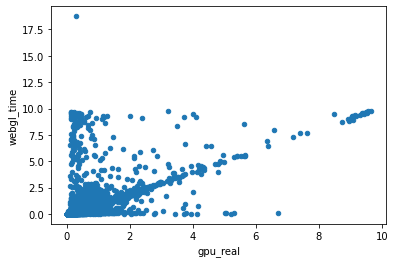

In [8]:
df_webgl[['gpu_real', 'webgl_time']].plot.scatter(x='gpu_real', y='webgl_time')

<Axes: ylabel='Frequency'>

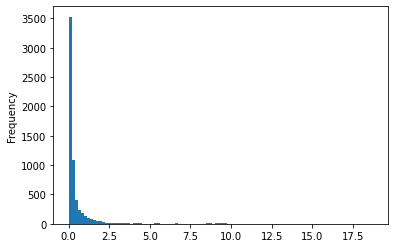

In [9]:
df_webgl.webgl_time.plot.hist(bins=100)

In [10]:
df_webgl[df_webgl.webgl_time > 10]

,status,cpu_real,cpu_full,gpu_real,gpu_full,webgl_time,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer,mem_mean_other,mem_detail
24642.proto.pkl,Ok,0.001933,0.001994,0.308621,18.757397,18.745922,94.247396,2057.074219,1425.828125,231.570312,{'Service: tracing.mojom.TracingService_4_3080...


In [11]:
df_webgl_array = df_webgl[['cpu_real', 'gpu_real', 'webgl_time', 'mem_mean_browser', 'mem_mean_gpu_process', 'mem_mean_renderer']]

In [12]:
df_webgl_array.corr(method='pearson')

,cpu_real,gpu_real,webgl_time,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer
cpu_real,1.000000,0.495913,0.290098,0.148771,0.221780,0.176630
gpu_real,0.495913,1.000000,0.576790,0.098642,0.285163,0.105847
webgl_time,0.290098,0.576790,1.000000,0.051050,0.188295,0.054961
mem_mean_browser,0.148771,0.098642,0.051050,1.000000,0.175991,0.583540
mem_mean_gpu_process,0.221780,0.285163,0.188295,0.175991,1.000000,0.285396
mem_mean_renderer,0.176630,0.105847,0.054961,0.583540,0.285396,1.000000


In [13]:
scaler = StandardScaler()
df_webgl_array_scaled = scaler.fit_transform(df_webgl_array)
df_webgl_array_scaled

array([[-1.98167236e-01,  4.69239975e-02, -1.59600676e-01,
         1.28320213e-01,  1.42697809e+00,  1.05482482e+00],
       [-4.08992766e-01,  5.82258348e-01,  1.30802636e-01,
        -1.14666763e-01, -6.01377552e-01,  2.46930796e-01],
       [ 2.44512081e+00,  3.74381262e+00,  5.82129931e+00,
        -4.00125390e-01, -2.38835686e-01, -5.72517351e-01],
       ...,
       [ 5.71928225e-03, -3.06626296e-01, -2.63554304e-01,
         2.84828446e-01,  9.51432925e-01,  1.50348635e+00],
       [ 1.27370920e-01, -1.88430386e-01, -1.96594236e-01,
        -2.65901088e-01,  7.76493395e-01, -2.47984436e-01],
       [-4.97084812e-01, -5.45043468e-01, -4.07161744e-01,
        -1.75977615e-01, -7.81436028e-01, -2.42809408e-01]])

In [14]:
df_webgl_array.corr()

,cpu_real,gpu_real,webgl_time,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer
cpu_real,1.000000,0.495913,0.290098,0.148771,0.221780,0.176630
gpu_real,0.495913,1.000000,0.576790,0.098642,0.285163,0.105847
webgl_time,0.290098,0.576790,1.000000,0.051050,0.188295,0.054961
mem_mean_browser,0.148771,0.098642,0.051050,1.000000,0.175991,0.583540
mem_mean_gpu_process,0.221780,0.285163,0.188295,0.175991,1.000000,0.285396
mem_mean_renderer,0.176630,0.105847,0.054961,0.583540,0.285396,1.000000


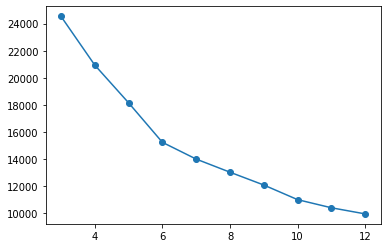

In [15]:
SSE = []
RANGE = range(3, 13)
for clusters in RANGE:
    km = KMeans(n_clusters=clusters, n_init='auto', random_state=42).fit(df_webgl_array_scaled)
    SSE.append(km.inertia_)
SSE = np.array(SSE)
plt.plot(RANGE, SSE, marker='o')

In [16]:
SSE[:-1] - SSE[1:]

array([3607.54807554, 2787.37708433, 2921.82502752, 1239.91093406,
        970.46019166,  947.19760995, 1081.96477089,  600.02344247,
        452.59144894])

In [17]:
N = 6
km = KMeans(n_clusters=N, n_init='auto', random_state=42).fit(df_webgl_array_scaled)
center = km.cluster_centers_
real_center = scaler.inverse_transform(center)
# real_center_0_1 = (center - center.min(axis=0)) / (center.max(axis=0) - center.min(axis=0)) 
labels = km.labels_
num = pd.Series(labels).value_counts().sort_index().astype(str)
r = pd.concat([num, pd.DataFrame(center)], axis=1)
r.columns = ['num'] + list(df_webgl_array.columns)
r

,num,cpu_real,gpu_real,webgl_time,mem_mean_browser,mem_mean_gpu_process,mem_mean_renderer
0,4422,-0.322984,-0.242282,-0.240866,-0.185967,-0.335756,-0.319571
1,1091,0.003077,-0.020661,-0.130890,0.284902,1.067465,0.893618
2,59,1.581572,7.304211,4.586176,0.214741,1.573971,0.400156
3,123,0.035292,0.178806,5.199270,-0.139751,0.165121,-0.199770
4,463,2.706606,1.318617,0.617474,-0.004665,0.300835,0.169855
5,76,0.978845,0.403609,0.158326,6.824596,0.908559,4.759726


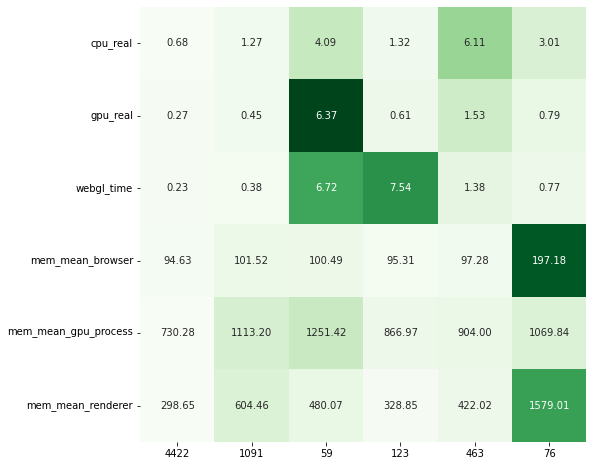

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(center.T, annot=real_center.T, fmt='.2f', cmap='Greens', xticklabels=num.values, yticklabels=df_webgl_array.columns, cbar=False) # type: ignore
plt.savefig('./output/figures/heatmap.pdf', bbox_inches='tight')